In [3]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [10]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\mehrotra"
gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

In [63]:
file_gurobi = jldopen(string(gurobi_path, "\\gurobi_barrier_allOFF.jld2"), "r")
gurobi = file_gurobi["stats"]
file_gurobi2 = jldopen(string(gurobi_path, "\\gurobi_barrier_scalingON.jld2"), "r")
gurobi2 = file_gurobi2["stats"] # scaling ON

file3 = jldopen(string(res_path, "\\mehrotra_ldl3_scaling.jld2"), "r") # check frontier 0.05
mehrotra3 = file3["stats"];
file4 = jldopen(string(res_path, "\\mehrotra_ldl4_scaling.jld2"), "r") # check frontier 0.05, new scaling
mehrotra4 = file4["stats"];
file5 = jldopen(string(res_path, "\\mehrotra_ldl5_scaling.jld2"), "r") # check frontier disabled
mehrotra5 = file5["stats"];
file6 = jldopen(string(res_path, "\\mehrotra_ldl6_scaling.jld2"), "r") # check frontier disabled
mehrotra6 = file6["stats"];# check frontier 0.001


In [64]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(mehrotra6)
end

close(file)

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.441178,25,9.03503e-12,2.73062e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00314403,15,1.39221e-11,5.1353e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000975132,10,6.53322e-12,2.81375e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.031718,27,3.6234e-10,5.11862e-7,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0676019,20,3.41436e-10,1.11951e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.066061,20,1.15601e-10,2.1409e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.345451,18,1.49455e-12,1.78844e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.0166612,17,4.30885e-9,4.75526e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.0326159,13,3.1777e-14,5.90025e-13,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [65]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(gurobi2)
end

close(file_gurobi)

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.107142,23,4.10438e-14,2.43465e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.0020721,12,6.40588e-11,5.1707e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000782013,7,8.65244e-16,3.31477e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0449359,30,2.93555e-11,1.92089e-8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0365658,16,3.34745e-11,6.91125e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.036387,16,5.84665e-12,6.88852e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.0145879,16,2.96058e-13,9.17594e-11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.00766802,9,4.16176e-11,2.72975e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.0040822,22,4.59918e-15,6.10285e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,


In [68]:
stats = Dict(:gurobi => gurobi, :gurobi2 => gurobi2,
            :mehrotra3 => mehrotra3, :mehrotra4=> mehrotra4, 
            :mehrotra5 => mehrotra5, :mehrotra6 => mehrotra6)

Dict{Symbol,DataFrame} with 6 entries:
  :gurobi    => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra3 => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra4 => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra6 => 87×30 DataFrame. Omitted printing of 23 columns…
  :gurobi2   => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra5 => 87×30 DataFrame. Omitted printing of 23 columns…

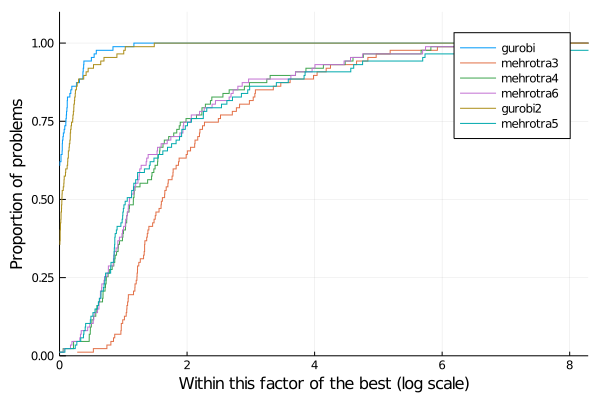

In [69]:
performance_profile(stats, df->df.elapsed_time)
